## Boston Housing Dataset

### About the Dataset
The Boston Housing Dataset contains information collected by the US Census Service in 1970 on various house prices in the area of Boston. The dataset is small in size with only 506 samples and 14 variables. The data gives values for various features of different suburbs of Boston as well as the median-value for homes in each suburb. The features were chosen to reflect various aspects believed to influence houses prices including the structure of the house (age and spaciousness), the quality of the neighborhood, transportation access to employment centers and highways, and pollution.

### Objective
The goals of this assessment are as follows:

 - describe the dataset using descriptive statistics and plots.


### Python Libraries
Python has a large number of libraries which makes it a powerful programming language for analysing data. The libraries that were imported and used in this project were NumPy, Pandas, Matplotlib, Seaborn, Sklearn, Scipy and Keras.

 - NumPy - an array processing package.
 - Pandas - a data processing library which provides tools for shaping, merging, reshaping, and slicing data sets.
 - Matplotlib - a graphing library to create 2D plots and graphs on a variety of data formats.
 - Seaborn library - a plotting and styling library.
 - Scikit-learn is a library that provides many unsupervised and supervised learning algorithms.
 - SciPy is a library that uses NumPy for more mathematical functions.
 - Keras is an open-source neural-network library written in Python.

In [1]:

# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for t-tests and ANOVA
import scipy.stats as stats

# for learning algorithms
import sklearn

# to create a neural network
import keras as kr

# for encoding categorical variables.
import sklearn.preprocessing as pre

# for splitting into training and test sets.
import sklearn.model_selection as mod

%matplotlib inline

# to increase the size of the plots as plots are too small otherwise
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Using TensorFlow backend.


## Load the dataset
The Boston Housing dataset can be accessed through the scikit-learn library. The dataset can be directly imported from the scikit-learn library rather than downloading the csv file from an external website. The Boston dataset is made of 506 rows and 14 columns. It is a relatively small, clean and well-known dataset used for machine learning projects.

In [2]:
# load the dataset from the scikit-learn library

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
# print the shape of the dataset and a description of the variables. This shows 506 samples, 14 variables and no missing values.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create a Panda's Dataframe
The data from the Boston dataset is transferred to a Panda's dataframe to carry out descriptive statistics on the dataset. A Panda's dataframe is a table structure with labelled rows and columns

In [4]:
# load data into dataframe and print the first 5 rows of data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# Print first 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Median value is a missing variable - the target variable - this needs to be added to the dataframe 
boston['MEDV'] = boston_dataset.target
# Print first 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# check for any missing values in the dataset - a clean dataset is required for analysis
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the boston dataset.

In [8]:
# check the type of data of all the variables
boston.dtypes

crime_rate             float64
large_zones            float64
industrial             float64
charles_river          float64
nitric_oxide           float64
rooms                  float64
old_houses             float64
distance               float64
highway_access         float64
property_tax           float64
pupil_teacher_ratio    float64
proportion_blacks      float64
lower_status           float64
median_value           float64
dtype: object

All the variables are data type float.

In [7]:
# rename the variables to the full variable name to avoid confusion
boston.columns = ['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status', 'median_value']
# print first 5 rows
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Descriptive Statistics
Now that the dataset has been loaded into a Panda's dataframe and the missing variable MEDV has been added, I will analyse the dataset to learn more about what it contains. The Panda's describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range (median), 50% quartile range and 75% quartile range are produced for each of the 14 variables.

In [9]:
# descriptive statistics are obtained using the describe function. Adding the .T swaps the rows and columns.
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
large_zones,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
industrial,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
charles_river,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitric_oxide,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
old_houses,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
highway_access,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
property_tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


It is difficult to obtain a clear picture of the dataset using the basic raw descriptive statistics - it is not very informative in this state. Visualisation tools provide a much better way to analyse the dataset and will give a better understanding of the data.

## Visualisations
The raw descriptive statistics gave all the relevant information on each of the variables in the dataset, however using visual tools such as histograms, boxplots and scatterplots make it easier to visualise the distribution of each of the 14 variables.

Using the Seaborn library I will plot the distribution of the target variable median_value using the histogram and boxplot functions. This target variable is the median-value of houses within a given suburb in $1'000's. I will also use the pairplot function in seaborn to visualise the distribution for crime_rate, rooms, pupil_teacher_ratio, lower_status and distance.

I will then calculate the correlation between variables using the corr function in Pandas and plot a heatmap using the Seaborn plotting library.

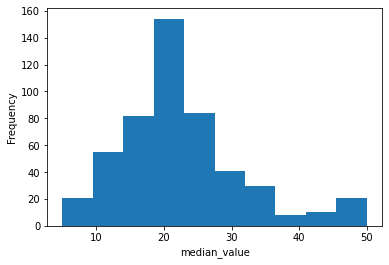

In [10]:
# create a histogram on the 'median_value'
plt.hist(boston['median_value'])
plt.xlabel("median_value")
plt.ylabel("Frequency")
plt.show()

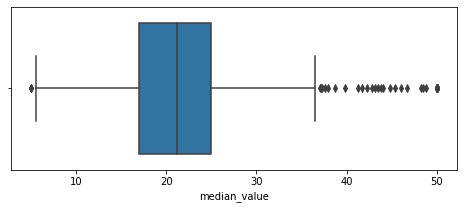

In [11]:
# create a boxplot on variable 'median_value'
plt.figure(figsize=(8,3))
sns.boxplot(boston['median_value'])

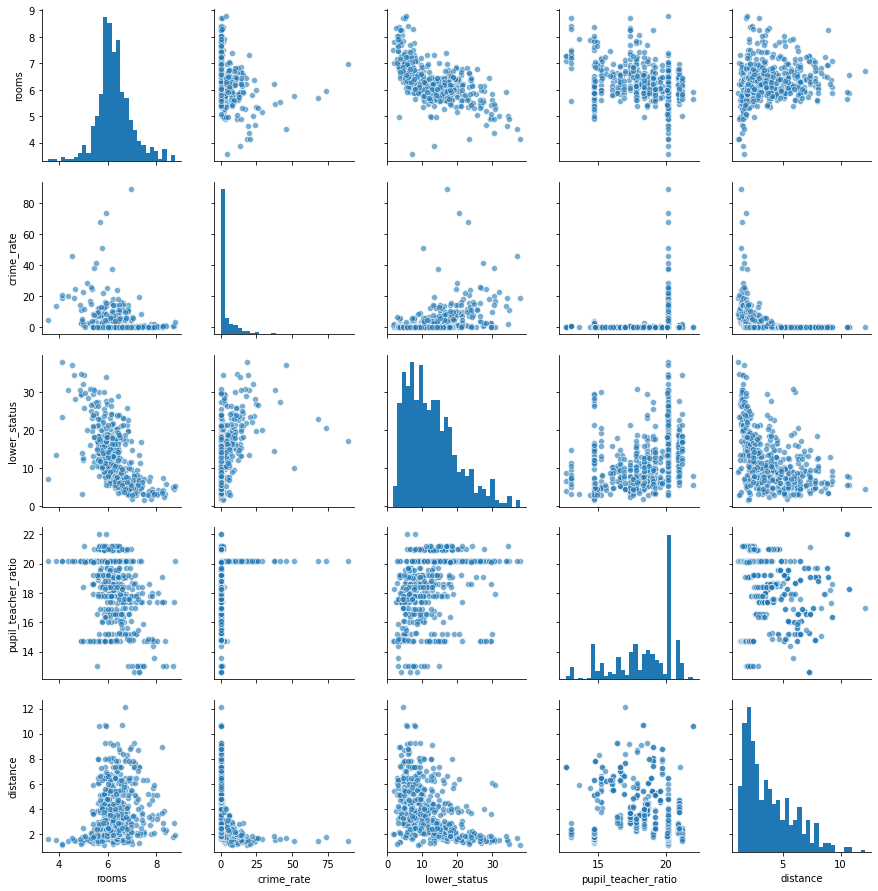

In [12]:
# create a variable called cols with list of variables
cols = ['rooms', 'crime_rate', 'lower_status', 'pupil_teacher_ratio', 'distance']

# create pairplots on the list of variables in cols
sns.pairplot(boston[cols],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30})

plt.show()

## Overview of Visualisation
Looking at the distribution on the histogram for the median_value it shows a distribution that is skewed right with several outliers. This means it is not normally distributed around the mean, but distributed slightly below the mean. The values are centred around approximately 22,000 and the minimum value is 5,000 and maximum value is 50,000.The boxplot shows a symmetric distribution with one outlier to the left and several to the right.The range of the distribution is 45,000.

Lower_status, crime_rate and distance are skewed right and rooms has the closest shape to a normal distribution

## Correlation
Finding the correlation between variables is a useful way to check for patterns in the dataset. To find the correlation between variables the Pandas .corr() function can be used. The output of each of these correlation functions will fall within the range -1 to +1. 1 indicates variables are positively correlated, -1 indicates variables are negatively correlated and 0 indicates variables are not correlated. The Pearson correlation coefficient measures the linear relationship between two datasets and requires that each dataset should be normally distributed. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data and does not require variables to be normally distributed. As the variables I closely examined are non-normal I will use the Spearman rank correlation coefficient. This will ensure that any relationships between variables are viable. I am going to calculate the Spearman coefficient on the variables to see what relationships can be found. I will be looking more closely at the relationships with the target value with a value higher than 0.54.

In [14]:
# run the Panda's corr function on the boston dataframe - method Pearson
boston.corr(method='spearman')

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
crime_rate,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
large_zones,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
industrial,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
charles_river,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
nitric_oxide,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
rooms,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
old_houses,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
distance,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
highway_access,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
property_tax,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


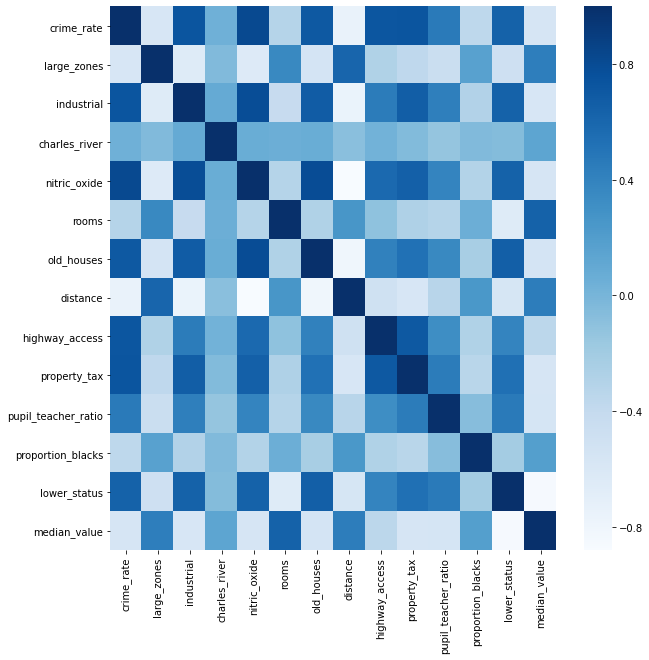

In [15]:
# using Pearson Correlation
plt.figure(figsize=(10,10))

# assign a variable cor
cor = boston.corr(method='spearman')

# create a heatmap in seaborn
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)

In [16]:
# Correlation with target variable
cor_target = abs(cor["median_value"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.54]
# print the features that are correlated to median_value
relevant_features

crime_rate             0.558891
industrial             0.578255
nitric_oxide           0.562609
rooms                  0.633576
old_houses             0.547562
property_tax           0.562411
pupil_teacher_ratio    0.555905
lower_status           0.852914
median_value           1.000000
Name: median_value, dtype: float64

I will look at the some of the relationships with median_value more closely by way of scatter plots. I will plot the target variable with crime_rate, rooms, pupil_teacher_ratio and lower_status.

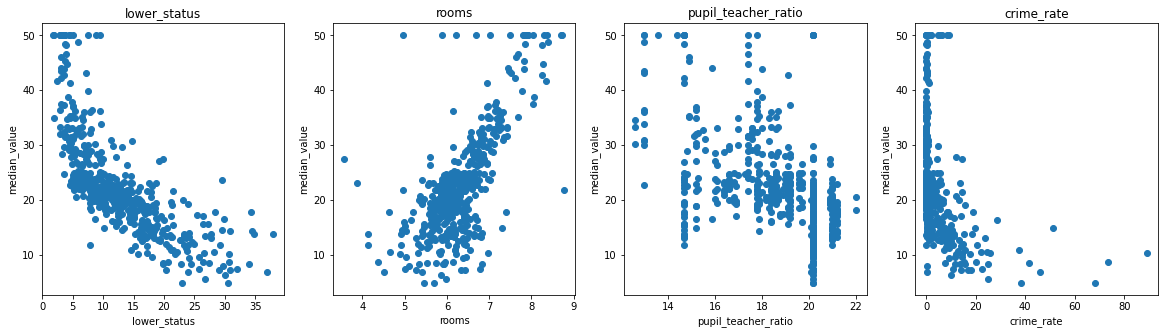

In [17]:
# set plot size
plt.figure(figsize=(20, 5))

# assign variables 
features = ['lower_status', 'rooms', 'pupil_teacher_ratio', 'crime_rate']
target = boston['median_value']

# plot each feature with target variable
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('median_value')

## Overview of Correlation
Rooms, pupil_teacher_ratio, crime_rate and lower_status are highly correlated to the target variable median_value with values over 0.54.

By looking at the correlation matrix we can see that rooms (average number of rooms per dwelling) has a strong positive correlation with median_value (0.7) where as lower_status (% lower status of the population) has a high negative correlation with median_value (-0.74). This makes sense as dwellings with more rooms are likely to be higher in value and where there is a lower status in the population it is likely that dwellings would be lower in value in that area. Also in areas where there are less schools and the pupil teacher ratio is higher we would expect that dwellings would be lower in value.

crime_rate is also negatively correlated with median_value - where the crime rate is higher house prices are lower.

The scatter plots visually show the relationships with the target variable and the high correlation whether negative or positive.

Large zones, charles river and distance are also postively correlated to the target variable. One would assume that houses by the river, more zoned area and distance to employment centres would increase the value of a house.

# NOTES
- Have to use peer reviewed articles
- Normalise Data
- remove outliers
- linear regression
- linear regression to predict house prices
- Need to include references

## References